In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter

In [2]:
def calcRelative(data):
    n = (data.shape[1] - 1)//2
    rel = np.zeros((data.shape[0], n))
    for i in range(n):
        vin = data[:, 2*i + 1]
        vout = data[:, 2*i + 2]
        rel[:, i] = vout/vin

    return rel

def plotData(freq, data, style="-o", xlabel = "Frequency (Hz)", ylabel = "$V_{out}/V_{in}$"):
    fig, ax = plt.subplots()

    for i in range(data.shape[1]):
        plt.plot(freq, data[:, i], style, label="$V_{%d}$"%i)

    ax.set_xscale("log")
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.xaxis.set_major_formatter(EngFormatter())
    ax.legend()

    return fig, ax

def loadData(name):
    return np.genfromtxt(name, delimiter=",", skip_header=2, usecols=range(0,7))

# Audio Amplifier 1

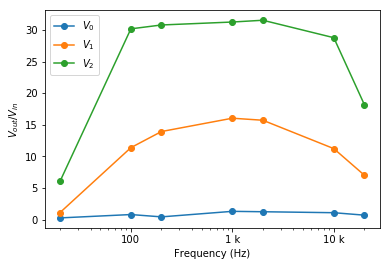

In [3]:
amp1 = loadData("raw/Amp1.csv")


rel1 = calcRelative(amp1)

fig, ax = plotData(amp1[:, 0], rel1)
fig.savefig("Relative_plot_amp1.pdf")
plt.show()

# Audio Amplifier 2

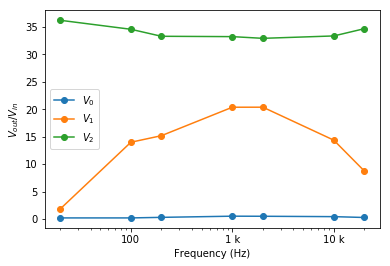

In [4]:
amp2 = loadData("raw/Amp2.csv")

rel2 = calcRelative(amp2)

fig, ax = plotData(amp2[:, 0], rel2)
fig.savefig("Relative_plot_amp2.pdf")
plt.show()

# Comparison

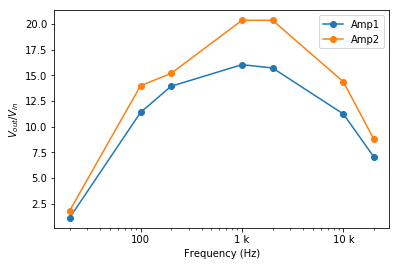

In [5]:
both = np.zeros((amp1.shape[0], 2))
both[:, 0] = rel1[:, 1]
both[:, 1] = rel2[:, 1]

fig, ax = plotData(amp1[:, 0], both)
ax.legend(["Amp1", "Amp2"])
fig.savefig("Both_amps_plot.pdf")
plt.show()